<h1 style="color: #FF6347;">Importing Libraries</h1>

In [20]:
# Importar librerías necesarias
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
# Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

<h1 style="color: #FF6347;">Load The Images</h1>

In [5]:
# Directorio del dataset
base_dir = '/content/drive/MyDrive/dataset'

# Generadores de datos
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Preprocesamiento de las imágenes
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Cargar las imágenes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


282/289 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.5603 - loss: 0.6826

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 1917s 6s/step - accuracy: 0.5617 - loss: 0.6816 - val_accuracy: 0.7660 - val_loss: 0.5450
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 81s 272ms/step - accuracy: 0.7127 - loss: 0.5677 - val_accuracy: 0.7334 - val_loss: 0.5465
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 80s 272ms/step - accuracy: 0.7864 - loss: 0.4562 - val_accuracy: 0.8118 - val_loss: 0.5023
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 81s 273ms/step - accuracy: 0.8153 - loss: 0.4063 - val_accuracy: 0.8456 - val_loss: 0.4201
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 82s 276ms/step - accuracy: 0.8533 - loss: 0.3394 - val_accuracy: 0.8589 - val_loss: 0.3418
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 80s 270ms/step - accuracy: 0.8910 - loss: 0.2672 - val_accuracy: 0.8733 - val_loss: 0.3324
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 80s 270ms/step - accuracy: 0.9071 - loss: 0.2314 - val_accuracy: 0.8830 - val_loss: 0.3601
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 80s 272ms/step - accuracy: 0.9175 - loss: 0.2125 - val_

Test accuracy: 0.9466403126716614


<h1 style="color: #FF6347;"> Construct The Model </h1>

In [ ]:
# Construcción del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


<h1 style="color: #FF6347;">Train The Model</h1>

In [ ]:
# Entrenamiento
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

<h1 style="color: #FF6347;">Evaluate The Model</h1>

In [ ]:
# Evaluar en el conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

<h1 style="color: #FF6347;">Export The Model</h1>

In [ ]:
# Guardar el modelo
model.save('/content/drive/MyDrive/model_fracturas.h5')

<h1 style="color: #FF6347;">Get Model Metrics</h1>

Found 506 images belonging to 2 classes.


C:\Users\EliteBook\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 541ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       238
           1       0.97      0.93      0.95       268

    accuracy                           0.95       506
   macro avg       0.95      0.95      0.95       506
weighted avg       0.95      0.95      0.95       506



<Figure size 800x600 with 0 Axes>

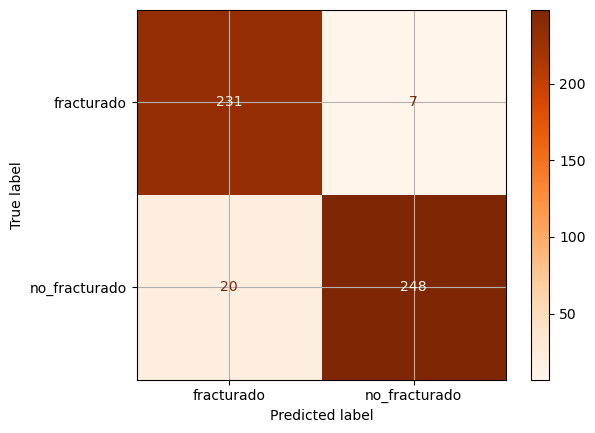

In [38]:
# Definir la ruta base del dataset
base_dir = os.path.join(os.getcwd(), 'dataset')  # Ruta actual + carpeta dataset

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Configuración del generador de datos
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Cargar imágenes del conjunto de prueba
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Ajustar al tamaño del modelo entrenado
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Importante para mantener el orden de las etiquetas reales
)

# Cargar el modelo previamente guardado
model_path = os.path.join(os.getcwd(), 'model_fractures.h5')  # Cambia si el modelo está en otro lugar
model = load_model(model_path)

# Realizar predicciones
test_generator.reset()  # Asegurarse de que el generador está en el inicio
predictions = (model.predict(test_generator) > 0.5).astype('int32').flatten()

# Obtener las etiquetas reales
y_test = test_generator.classes

# Imprimir métricas
print(classification_report(y_test, predictions))

# Matriz de confusión
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.show()